👉 Please upload your image file (e.g., aeval1.bmp)


Saving aeval1.bmp to aeval1.bmp
✅ Uploaded file: aeval1.bmp


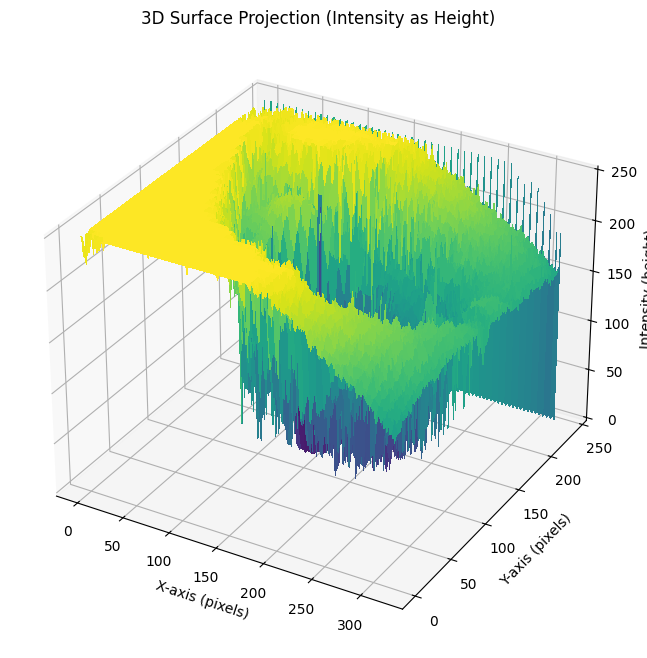

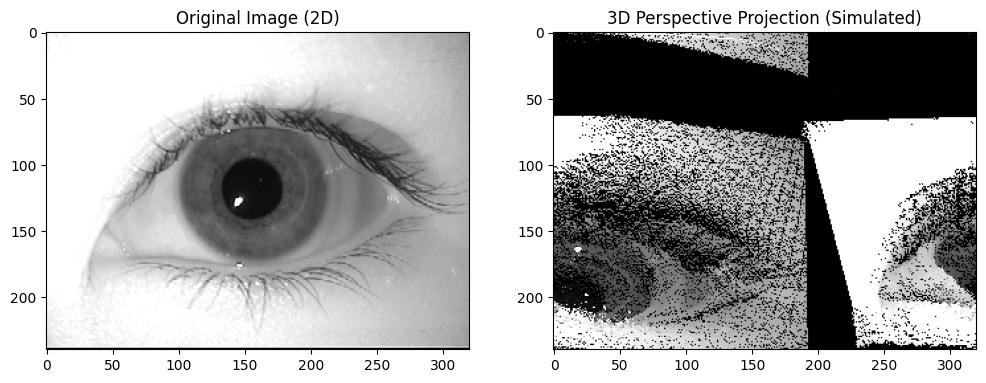

⬇️ Download processed images:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# ==========================================================
# 3D Projection of a 2D Image (Orthographic + Perspective)
# ==========================================================

# Step 1: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

# Step 2: Upload your image
print("👉 Please upload your image file (e.g., aeval1.bmp)")
uploaded = files.upload()

# Automatically get the uploaded file name
for fn in uploaded.keys():
    image_path = fn
    print(f"✅ Uploaded file: {fn}")

# Step 3: Load image and convert to grayscale
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rows, cols = gray.shape

# Step 4: Generate 3D surface projection
X = np.arange(0, cols)
Y = np.arange(0, rows)
X, Y = np.meshgrid(X, Y)
Z = gray  # pixel intensity as height

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False)
ax.set_title("3D Surface Projection (Intensity as Height)")
ax.set_xlabel("X-axis (pixels)")
ax.set_ylabel("Y-axis (pixels)")
ax.set_zlabel("Intensity (height)")
plt.show()

# Step 5: Apply 3D Perspective Projection using transformation matrix
# Create a 3D rotation and projection effect manually
theta = np.radians(35)
phi = np.radians(25)
f = 800  # focal length

# Define rotation matrices
R_x = np.array([
    [1, 0, 0],
    [0, np.cos(theta), -np.sin(theta)],
    [0, np.sin(theta), np.cos(theta)]
])

R_y = np.array([
    [np.cos(phi), 0, np.sin(phi)],
    [0, 1, 0],
    [-np.sin(phi), 0, np.cos(phi)]
])

# Combined rotation
R = np.dot(R_y, R_x)

# Create grid of (X,Y,Z) points
Z = gray.astype(np.float32) / 255.0 * 100  # scale intensity to height
points = np.vstack((X.flatten(), Y.flatten(), Z.flatten()))

# Apply rotation
rotated = R @ points

# Apply perspective projection
proj_2d = np.zeros((2, rotated.shape[1]))
proj_2d[0] = f * rotated[0] / (f + rotated[2])
proj_2d[1] = f * rotated[1] / (f + rotated[2])

# Normalize and reshape for visualization
proj_img = np.zeros_like(gray)
for i in range(proj_2d.shape[1]):
    x = int(proj_2d[0, i] + cols / 2) % cols
    y = int(proj_2d[1, i] + rows / 2) % rows
    proj_img[y, x] = gray.flatten()[i]

# Step 6: Display both views
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image (2D)")

plt.subplot(1, 2, 2)
plt.imshow(proj_img, cmap='gray')
plt.title("3D Perspective Projection (Simulated)")
plt.show()

# Step 7: Save and allow download
cv2.imwrite("3D_surface_projection.png", gray)
cv2.imwrite("3D_perspective_projection.png", proj_img)
print("⬇️ Download processed images:")
files.download("3D_surface_projection.png")
files.download("3D_perspective_projection.png")
